In [1]:
'''import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
fetch_housing_data()
'''

'import os\nimport tarfile\nfrom six.moves import urllib\n\nDOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"\nHOUSING_PATH = "datasets/housing"\nHOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"\n\ndef fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):\n    if not os.path.isdir(housing_path):\n        os.makedirs(housing_path)\n    tgz_path = os.path.join(housing_path, "housing.tgz")\n    urllib.request.urlretrieve(housing_url, tgz_path)\n    housing_tgz = tarfile.open(tgz_path)\n    housing_tgz.extractall(path=housing_path)\n    housing_tgz.close()\n    \nfetch_housing_data()\n'

In [2]:
import pandas as pd
import numpy as np

In [3]:
housing = pd.read_csv('datasets/housing/housing.csv')

In [4]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022001102A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002200139AA90>]], dtype=object)

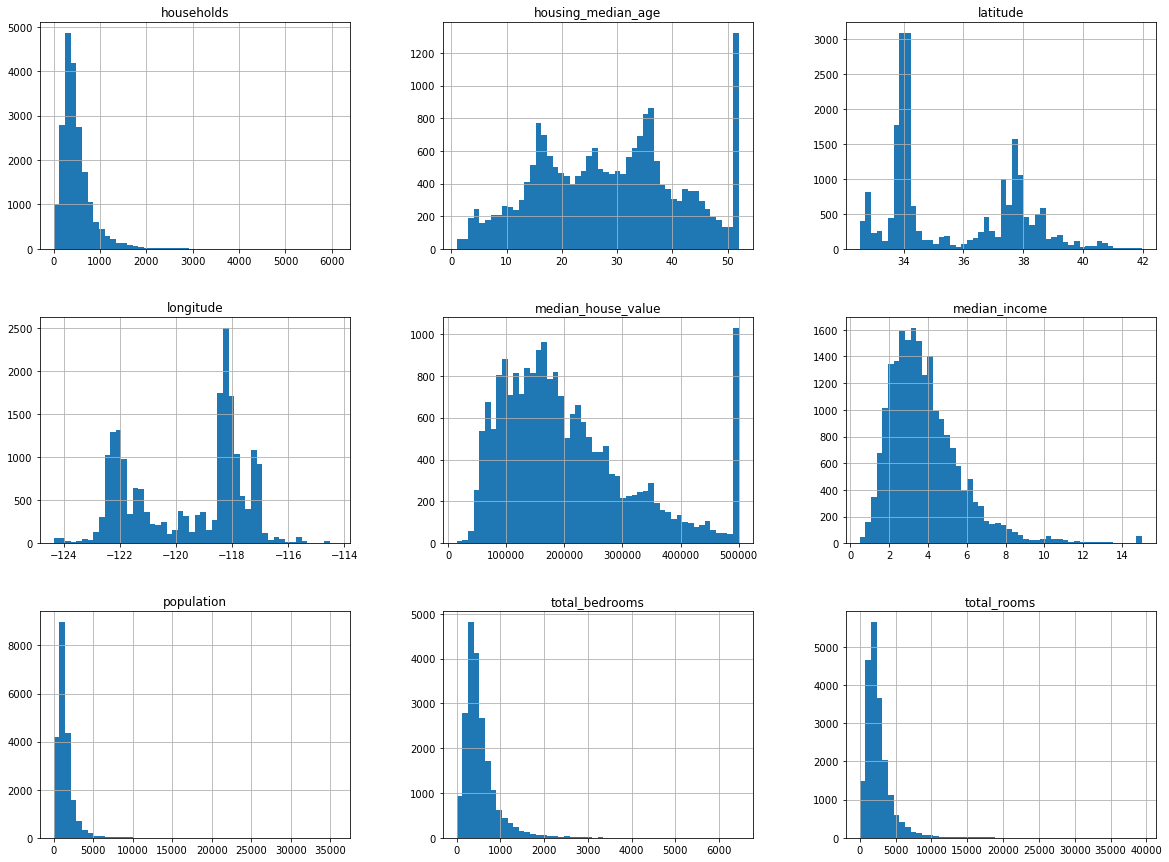

In [8]:
housing.hist(bins=50, figsize=(20,15))

In [9]:
housing_with_id = housing.reset_index()

In [10]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### stratified sampling
* the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population
* each stratum should be large enough, else it will be biased

In [12]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5, inplace=True)

In [13]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# because of n_splits=1, it iterates only once!
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

Now put the test set aside!

In [16]:
housing = strat_train_set.copy()

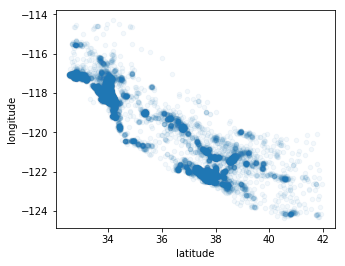

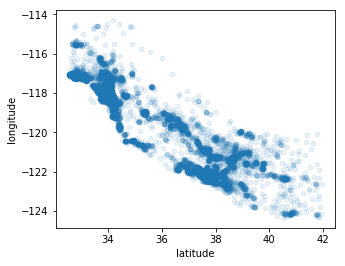

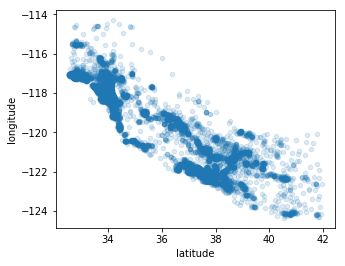

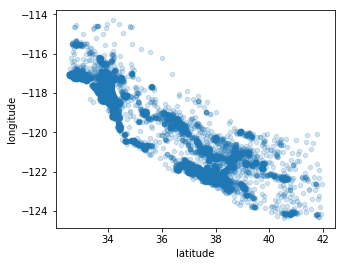

In [17]:
for i in np.arange(0.05,0.25,0.05):
    housing.plot(kind='scatter', x='latitude', y='longitude', figsize=(5,4), alpha=i)

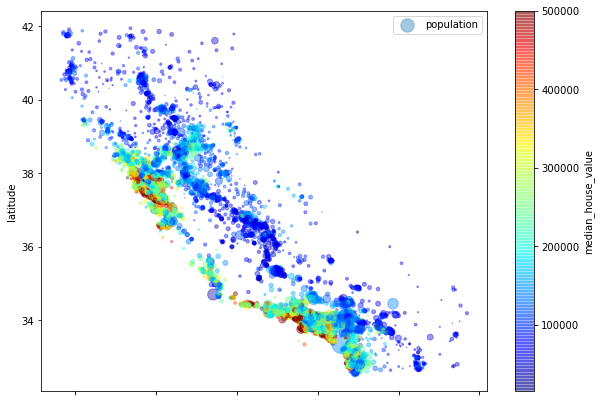

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
            figsize=(10,7))
plt.legend()

In [19]:
corr_matrix = housing.corr()

In [20]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [21]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

It only measures **linear** correlations! Nonlinear relationships are harder to discover.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022003FDA7B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022004393A90>]], dtype=object)

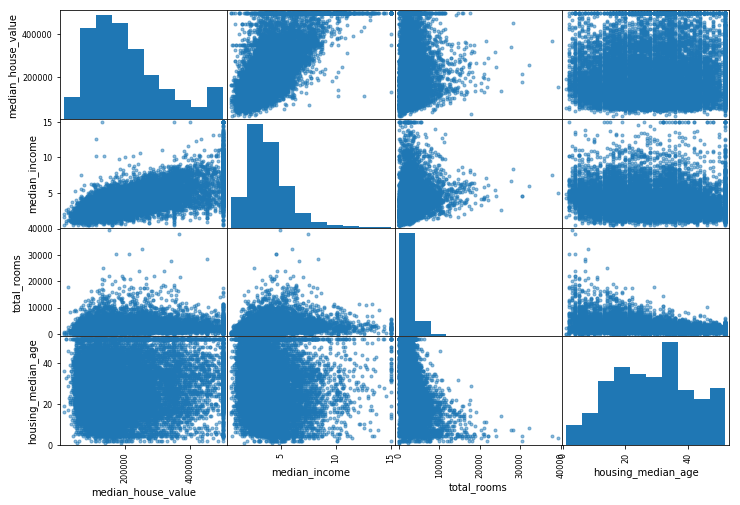

In [22]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

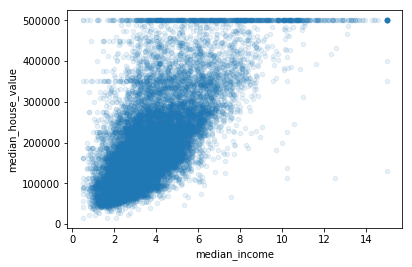

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [24]:
housing[housing['median_house_value']>=500000].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8879,-118.50,34.04,52.0,2233.0,317.0,769.0,277.0,8.3839,500001.0,<1H OCEAN
4861,-118.28,34.02,29.0,515.0,229.0,2690.0,217.0,0.4999,500001.0,<1H OCEAN
15614,-122.41,37.81,25.0,1178.0,545.0,592.0,441.0,3.6728,500001.0,NEAR BAY
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
16121,-122.46,37.79,52.0,2059.0,416.0,999.0,402.0,3.7419,500001.0,NEAR BAY


In [25]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [26]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [27]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [28]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
X = imputer.fit_transform(housing_num)

In [29]:
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [30]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [33]:
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3], dtype=int64)

In [34]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

* ML algorithms will assume that two nearby values are more similar than two distant values.
* create one binary attribute per category

In [35]:
from sklearn.preprocessing import OneHotEncoder

In [36]:
oh_encoder = OneHotEncoder()

In [37]:
housing_cat_oh = oh_encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
# -1 means unspecified

In [38]:
housing_cat_oh

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Label encoding and 1-Hot Combined

In [39]:
from sklearn.preprocessing import LabelBinarizer

In [40]:
encoder = LabelBinarizer()
housing_cat_oh = encoder.fit_transform(housing_cat)

In [41]:
housing_cat_oh

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### Building estimators

In [42]:
from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin

In [43]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [44]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [45]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [46]:
housing_extra_attribs.shape # 11 total features (9+2)

(16512, 11)

### Feature scaling
* min-max scaling (normalization)
    * 0-1
    * MinMaxScaler
* standardization
    * (x - mean(X))/variance
    * much less affected by outliers
    * StandardScaler

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

### Data preprocessing pipeline

In [49]:
from sklearn.pipeline import FeatureUnion

num_attribs = list(housing_num) # ['a', 'b', ...]
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', Imputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', LabelBinarizer()),
])

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [50]:
housing_prepared = full_pipeline.fit_transform(housing)

In [51]:
housing_prepared.shape

(16512, 16)

## Regressors

#### Linear regression

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [55]:
print("Predictions:\t", lin_reg.predict(some_data_prepared))

Predictions:	 [ 210644.60459286  317768.80697211  210956.43331178   59218.98886849
  189747.55849879]


In [56]:
print("Labels:\t\t", list(some_labels))

Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489234

#### Decision tree

In [59]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [60]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### Cross validate it, because it's suspicious

In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [62]:
rmse_scores

array([ 68072.42629515,  65209.70719916,  71759.19038788,  69682.31195526,
        69507.08748802,  75107.49485777,  70402.67131097,  71642.28093443,
        75889.04001465,  69144.71819534])

In [63]:
def display_scores(score):
    print(score)
    print(score.mean())
    print(score.std())

display_scores(rmse_scores)

[ 68072.42629515  65209.70719916  71759.19038788  69682.31195526
  69507.08748802  75107.49485777  70402.67131097  71642.28093443
  75889.04001465  69144.71819534]
70641.6928639
3005.68496824


#### Random forest

In [64]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [65]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22295.259748339671

In [66]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
display_scores(rmse_scores)

[ 51586.20073195  49821.41446222  53535.20658397  54301.45796993
  52771.1364625   55749.48223142  51845.24583084  50575.65961589
  55975.25522385  52615.57642008]
52877.6635533
1943.08134027


## Saving - Loading models

In [67]:
from sklearn.externals import joblib

In [68]:
joblib.dump(forest_reg, "my_model.pkl")
# and later...
forest_reg_loaded = joblib.load("my_model.pkl")
forest_reg_loaded.base_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

## Fine-tune models

#### GridSearch

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=8, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=8, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'bootstrap': [False], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [71]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [72]:
np.sqrt(-grid_search.best_score_)

49698.382650111285

In [73]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [74]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63173.7721457 {'n_estimators': 3, 'max_features': 2}
54837.631814 {'n_estimators': 10, 'max_features': 2}
52624.124834 {'n_estimators': 30, 'max_features': 2}
59903.5893395 {'n_estimators': 3, 'max_features': 4}
52772.1949757 {'n_estimators': 10, 'max_features': 4}
50491.1220868 {'n_estimators': 30, 'max_features': 4}
58684.5032003 {'n_estimators': 3, 'max_features': 6}
52513.4091922 {'n_estimators': 10, 'max_features': 6}
49916.2922603 {'n_estimators': 30, 'max_features': 6}
58865.5111825 {'n_estimators': 3, 'max_features': 8}
51695.3127036 {'n_estimators': 10, 'max_features': 8}
49698.3826501 {'n_estimators': 30, 'max_features': 8}
62342.7465475 {'n_estimators': 3, 'bootstrap': False, 'max_features': 2}
53492.4833078 {'n_estimators': 10, 'bootstrap': False, 'max_features': 2}
59644.2605749 {'n_estimators': 3, 'bootstrap': False, 'max_features': 3}
52309.0826189 {'n_estimators': 10, 'bootstrap': False, 'max_features': 3}
56746.6633675 {'n_estimators': 3, 'bootstrap': False, 'max_featu

#### Randomized search
* RandomizedSearchCV

#### Analyze best models

In [75]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([  6.74778581e-02,   6.02717521e-02,   4.20324825e-02,
         1.64912389e-02,   1.46956540e-02,   1.56484578e-02,
         1.43618161e-02,   3.41181055e-01,   4.65507301e-02,
         1.08812688e-01,   7.15867331e-02,   5.18562463e-03,
         1.90545335e-01,   1.39197917e-04,   2.07741393e-03,
         2.94196278e-03])

In [76]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34118105543806476, 'median_income'),
 (0.19054533484962269, 'INLAND'),
 (0.10881268770512646, 'pop_per_hhold'),
 (0.071586733086079601, 'bedrooms_per_room'),
 (0.067477858140161107, 'longitude'),
 (0.060271752073735661, 'latitude'),
 (0.046550730141100803, 'rooms_per_hhold'),
 (0.042032482487806562, 'housing_median_age'),
 (0.016491238902513288, 'total_rooms'),
 (0.015648457834938193, 'population'),
 (0.014695653973630209, 'total_bedrooms'),
 (0.014361816104397344, 'households'),
 (0.0051856246333822935, '<1H OCEAN'),
 (0.0029419627782987607, 'NEAR OCEAN'),
 (0.0020774139337066968, 'NEAR BAY'),
 (0.00013919791743553613, 'ISLAND')]

In [77]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [78]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48388.007145156138